In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [106]:
# read data
data = pd.read_csv("CA.csv")
# divide train data and test data
"""hydro = data['HYTCP'][:-10]
hydro2 = data['HYTCP'][-10:]
wind = data['WYTCP'][:-10]
wind2 = data['WYTCP'][-10:]
solar = data['SOEGP'][:-10]
solar2 = data['SOEGP'][-10:]
nuclear = data['NUETP'][:-10]
nuclear2 = data['NUETP'][-10:]"""
year1 = data[['Year']][-10:]
#print(year1)
year2 = data[['Year']][:-10]

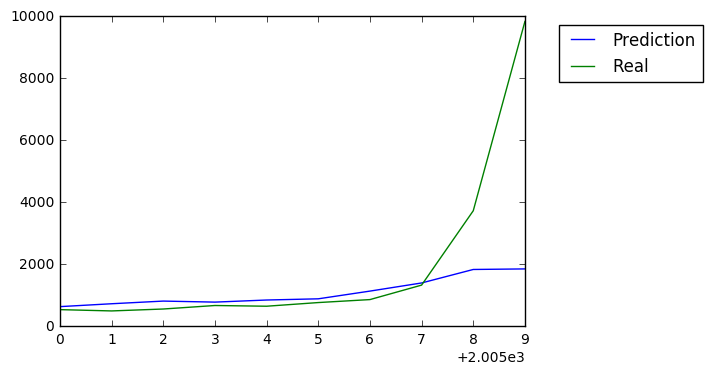

In [107]:
# let hydro, wind, nuclear be predictors X, solar be Y
train_x = data[['HYTCP', 'WYTCP', 'NUETP']][:-10]
train_y = data['SOEGP'][:-10]
# let last ten be test data
#test_x = data[['HYTCP'[-10:], 'WYTCP'[-10:], 'NUETP'[-10:]]]
test_x = data[['HYTCP', 'WYTCP', 'NUETP']][-10:]
test_y = data['SOEGP'][-10:]
#print(test_x.shape)
# do regular multiple linear regression on train data
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

# plot prediction for last 10 yrs with test_x
fig = plt.figure()
plt.plot(data[['Year']][-10:], regr.predict(data[['HYTCP', 'WYTCP', 'NUETP']][-10:]), linewidth = 1)
# plot real data
plt.plot(year1, test_y)
# legend
plt.legend(['Prediction', 'Real'], bbox_to_anchor=(1.4, 1))
plt.show()

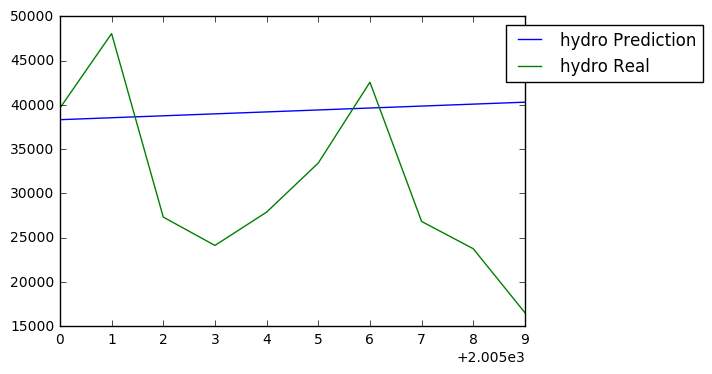

In [116]:
year1 = data[['Year']][-10:]
#print(year1)
year2 = data[['Year']][:-10]
# Use previous year data of own type to predict future data: Hydro data
hydro_train = data[['HYTCP']][:-10]
hydro_test = data[['HYTCP']][-10:]
# do regular multiple linear regression on train data
regr = linear_model.LinearRegression()
regr.fit(year2, hydro_train)

# plot prediction for last 10 yrs hydro
fig = plt.figure()
plt.plot(year1, regr.predict(data[['Year']][-10:]), linewidth = 1)
# plot real data
plt.plot(year1, hydro_test)
# legend
plt.legend(['hydro Prediction', 'hydro Real'], bbox_to_anchor=(1.4, 1))
plt.show()

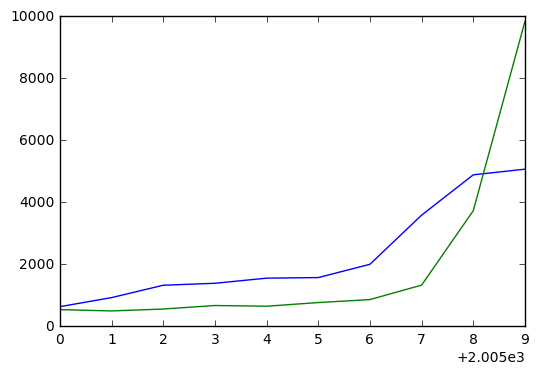

In [97]:
# Ridge Regression
# let hydro, wind, nuclear be predictors X, solar be Y

regr2 = linear_model.Ridge(alpha = 0.1)
regr2.fit(train_x, train_y)

# plot prediction
fig = plt.figure()
plt.plot(data[['Year']][-10:], regr2.predict(data[['HYTCP', 'WYTCP', 'NUETP']][-10:]), linewidth = 1)
# plot real data
plt.plot(year1, test_y)
plt.show()

In [30]:
# Lasso Regression
# let hydro, wind, nuclear be predictors X, solar be Y

regr3 = linear_model.Lasso()
regr3.fit(data[['HYTCP', 'WYTCP', 'NUETP']], solar)
# plot
testx = data[['HYTCP'[-10:], 'WYTCP'[-10:], 'NUETP'[-10:]]]
fig = plt.figure()
plt.plot(testx, regr3.predict(testx), linewidth = 1)
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [55, 45]